## Welcome to Day 11 - Homework!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housepricesdata.csv')

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

In [3]:
df.head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


In [5]:
df['Unit_Name'].isnull()[1491]

True

In [6]:
# Karena terdapat 1 missing value pada Unit_Name, maka dapat "disingkirkan" 
df_update = df.dropna(axis = 0).reset_index(drop = True)
df_update

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5298,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5299,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5300,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


No 1.  Membuat kolom `CleanedPrice`

In [7]:
def convert(x,y): 
    if x == 'USD':
        return y*15000
    else : 
        return y

In [8]:
df_update['CleanedPrice']=np.vectorize(convert)(df_update['Currency'],df_update['Annual_Price'])
df_update

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5298,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5299,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5300,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


In [9]:
df_update[df_update['Currency']=='USD'].head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800,432000000
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400,306000000
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600,324000000
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600,414000000


No 2. `No_Rooms` vs `CleanedPrice`

In [10]:
a=df_update[['No_Rooms','CleanedPrice']]

In [11]:
a.groupby('No_Rooms').describe()

CleanedPrice                                                          \
                count          mean           std           min           25%   
No_Rooms                                                                        
0              1113.0  7.768541e+08  2.427792e+10  1.200000e+07  3.240000e+07   
1               990.0  8.502813e+07  5.567055e+07  1.700000e+07  4.500000e+07   
2              2566.0  1.030421e+08  8.770997e+07  1.500000e+07  4.612500e+07   
3               612.0  2.248974e+08  1.513185e+08  1.800000e+07  1.150000e+08   
4                18.0  4.405861e+08  4.014643e+08  1.080000e+08  2.075000e+08   
5                 2.0  7.328000e+08  4.355778e+07  7.020000e+08  7.174000e+08   
6                 1.0  1.000000e+09           NaN  1.000000e+09  1.000000e+09   

                                                    
                   50%           75%           max  
No_Rooms                                            
0         4.000000e+07  5.700000e+07  8.100000e+11  
1         6.862500e+07  1.080000e+08  4.740000e+08  
2         6.700000e+07  1.320000e+08  5.940000e+08  
3         1.813500e+08  3.000000e+08  1.128000e+09  
4         2.950000e+08  4.942500e+08  1.620000e+09  
5         7.328000e+08  7.482000e+08  7.636000e+08  
6         1.000000e+09  1.000000e+09  1.000000e+09

In [12]:
df_update.corr('pearson')

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
No_Rooms,1.000000,0.525022,-0.015914,-0.039150,0.035654,0.175465,0.227131,0.427956,-0.017502
Bathroom,0.525022,1.000000,-0.035971,-0.017497,0.026922,0.199039,0.151486,0.607971,-0.000580
Longitude,-0.015914,-0.035971,1.000000,-0.154300,0.020934,-0.016084,-0.069173,-0.038125,0.000734
Latitude,-0.039150,-0.017497,-0.154300,1.000000,-0.014586,-0.009593,0.015515,-0.027784,-0.001671
Furnished,0.035654,0.026922,0.020934,-0.014586,1.000000,0.017435,0.431238,0.155539,0.007459
Area,0.175465,0.199039,-0.016084,-0.009593,0.017435,1.000000,0.018992,0.223865,-0.000906
Total_Facilities,0.227131,0.151486,-0.069173,0.015515,0.431238,0.018992,1.000000,0.262037,0.004540
Annual_Price,0.427956,0.607971,-0.038125,-0.027784,0.155539,0.223865,0.262037,1.000000,0.001717
CleanedPrice,-0.017502,-0.000580,0.000734,-0.001671,0.007459,-0.000906,0.004540,0.001717,1.000000


In [13]:
df_update.corr('spearman')

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
No_Rooms,1.000000,0.542650,0.087690,0.046418,0.037714,0.719234,0.255142,0.443434,0.473194
Bathroom,0.542650,1.000000,-0.086802,-0.092328,0.039395,0.653035,0.217174,0.529195,0.578378
Longitude,0.087690,-0.086802,1.000000,-0.038496,0.111058,-0.050420,0.095256,-0.014391,-0.026543
Latitude,0.046418,-0.092328,-0.038496,1.000000,-0.195686,-0.015399,-0.038324,-0.197709,-0.228380
Furnished,0.037714,0.039395,0.111058,-0.195686,1.000000,0.070500,0.421334,0.266198,0.277142
Area,0.719234,0.653035,-0.050420,-0.015399,0.070500,1.000000,0.376599,0.763841,0.809484
Total_Facilities,0.255142,0.217174,0.095256,-0.038324,0.421334,0.376599,1.000000,0.447892,0.464660
Annual_Price,0.443434,0.529195,-0.014391,-0.197709,0.266198,0.763841,0.447892,1.000000,0.946194
CleanedPrice,0.473194,0.578378,-0.026543,-0.228380,0.277142,0.809484,0.464660,0.946194,1.000000


In [14]:
pivot0 = pd.pivot_table(a, values='CleanedPrice',index=['No_Rooms'],aggfunc=np.mean)
pivot0

,CleanedPrice
No_Rooms,
0,7.768541e+08
1,8.502813e+07
2,1.030421e+08
3,2.248974e+08
4,4.405861e+08
5,7.328000e+08
6,1.000000e+09


<Figure size 432x288 with 0 Axes>

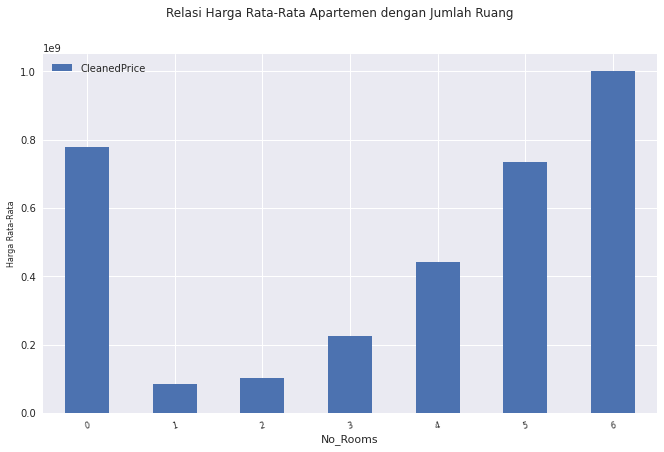

In [15]:
fig = plt.figure()
with plt.style.context('seaborn'):
    pivot0.plot(kind='bar',figsize=(11,6/10*11))
    plt.xticks(rotation = 15,fontsize=8)            
    plt.suptitle('Relasi Harga Rata-Rata Apartemen dengan Jumlah Ruang')
    plt.ylabel('Harga Rata-Rata', fontsize=8)               

plt.show()

- Visualisasi data menunjukkan bahwa `No_Rooms` dengan value 0 memiliki rata-rata harga yang lebih tinggi dibandingkan `No_Rooms` dengan value 
  1 hingga 5 dan cukup janggal. 
- Beberapa asumsi yang dapat diambil, misalkan ada kesalahan input `Currency` yang seharusnya IDR namun ditulis USD. Salah 1 hal yang dapat
   dilakukan adalah membuang data pada `No_Rooms` = 0 yang outliers, namun akan sangat riskan mengingat jumlah data yang terbuang akan sangat banyak. 
- Dari perhitungan korelasi Spearman (dipilih karena tidak tahu sebaran datanya selinear apa), `No_Rooms` berkaitan erat 
  dengan `Area` dengan r=0.71
- Data-data yang outliers pada `No_Rooms` = 0 akan coba diperbaiki dengan melakukan regresi 

In [16]:
df_update.groupby('No_Rooms')['Area'].describe()

,count,mean,std,min,25%,50%,75%,max
No_Rooms,,,,,,,,
0,1113.0,27.086020,7.640417,0.0,22.00,26.0,30.0,102.0
1,990.0,44.723202,18.051468,0.0,35.00,40.0,49.0,129.0
2,2566.0,64.990312,217.525013,0.0,36.00,49.0,76.0,7781.0
3,612.0,125.468627,99.857288,0.0,84.75,112.0,150.0,2014.0
4,18.0,241.388889,119.113460,92.0,161.75,227.0,263.0,548.0
5,2.0,470.000000,246.073160,296.0,383.00,470.0,557.0,644.0
6,1.0,576.000000,NaN,576.0,576.00,576.0,576.0,576.0


In [17]:
from sklearn.linear_model import LinearRegression
### Membuat sebuah LinearRegression
lr = LinearRegression()
df_temp = df_update.copy()
### Seleksi kolom-kolom yang digunakan
selected_cols = ['No_Rooms', 'Area', 'CleanedPrice']

# Hitung IQR
# df_update[df_update['No_Rooms']==0][['No_Rooms','Area','CleanedPrice']].groupby('No_Rooms')['CleanedPrice'].describe()
x=df_temp[df_temp['No_Rooms']==0][selected_cols]
Q1 = x['CleanedPrice'].quantile(0.25)
Q3 = x['CleanedPrice'].quantile(0.75)
IQR = Q3 - Q1

# Bagi menjadi Missing dan Training. Missing Df berisi baris-baris dengan 'No_Rooms' outlier.
missing_df = x.query("CleanedPrice < (@Q1 - 1.5 * @IQR) or CleanedPrice > (@Q3 + 1.5 * @IQR)")[selected_cols]
training_df = x.query("CleanedPrice >= (@Q1 - 1.5 * @IQR) and CleanedPrice <= (@Q3 + 1.5 * @IQR)")[selected_cols]

# Membuat model regression dari baris-baris yang tidak memiliki missing values
y_train = training_df['CleanedPrice']
x_train = training_df.drop('CleanedPrice', axis = 1)

lr.fit(x_train, y_train)

# Prediksi nilai 'CleanedPrice' pada baris-baris yang memiliki outliers values
x_missing = missing_df.drop('CleanedPrice', axis = 1)

prediction = lr.predict(x_missing)
missing_df['CleanedPrice'] = prediction

In [18]:
### Combine all into one dataframe
df_full = pd.concat([training_df, missing_df])
df_full = df_full.sort_index()

df_update_reg = df_update.copy()

df_update_reg[df_update_reg['No_Rooms']==0][selected_cols]=df_full[selected_cols]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<Figure size 432x288 with 0 Axes>

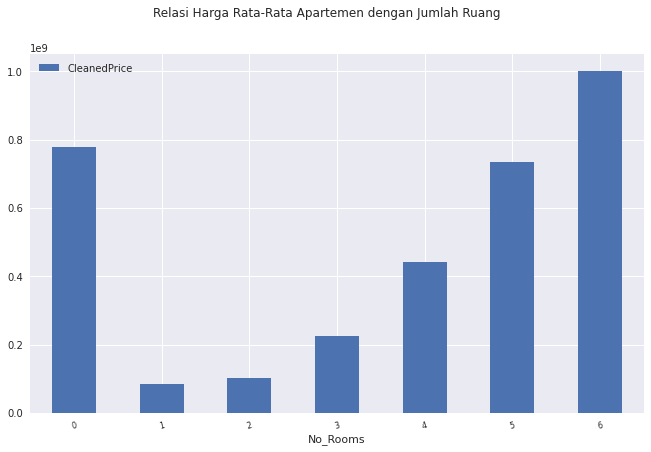

In [19]:
b=df_update_reg[['No_Rooms','CleanedPrice']]

pivot00 = pd.pivot_table(b, values='CleanedPrice',index=['No_Rooms'],aggfunc=np.mean)
pivot00.astype('object')

fig = plt.figure()
with plt.style.context('seaborn'):
    pivot00.plot(kind='bar',figsize=(11,6/10*11))
    plt.xticks(rotation = 15,fontsize=8)      
    plt.suptitle('Relasi Harga Rata-Rata Apartemen dengan Jumlah Ruang')                         

plt.show()

Setelah melakukan model regresi, didapat bahwa`No_Rooms` = 0 memiliki rata-rata harga lebih rendah dibanding `No_Rooms` 1 sampai 5 dan lebih masuk akal

No 3. Plot `Region` vs rata-rata `CleanedPrice` 

In [20]:
#Membuat dataframe yang hanya berisi Region dan CleanedPrice
df_new=df_update[['Region','CleanedPrice']]
df_new

,Region,CleanedPrice
0,Jakarta Selatan,96000000
1,Jakarta Barat,30000000
2,Jakarta Barat,70000000
3,Jakarta Selatan,576000000
4,Jakarta Barat,32000000
...,...,...
5297,Bekasi,36000000
5298,Tangerang,60000000
5299,Jakarta Selatan,250000000
5300,Jakarta Pusat,108000000


In [21]:
#dataframe dijadikan pivot table dengan menghitung nilai rata-rata dari CleanedPrice
pivot1=pd.pivot_table(df_new, values='CleanedPrice',index=['Region'],aggfunc=np.mean)

<Figure size 432x288 with 0 Axes>

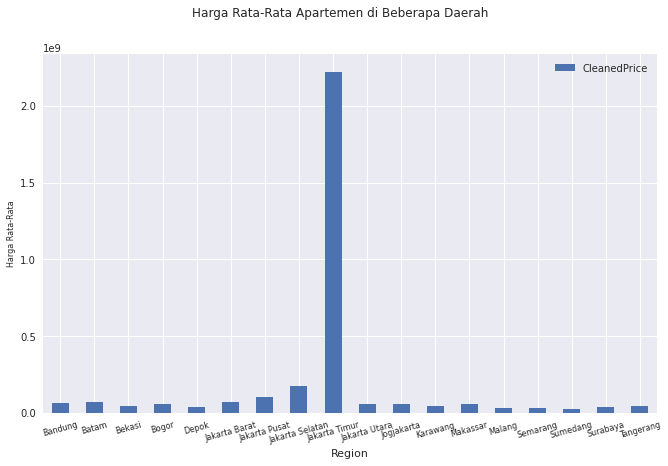

In [22]:
# Membuat grafik dengan barplot
fig = plt.figure()
with plt.style.context('seaborn'):
    pivot1.plot(kind='bar',figsize=(11,6/10*11))
    plt.xticks(rotation = 15,fontsize=8)             
    plt.ylabel('Harga Rata-Rata', fontsize=8)       
    plt.suptitle('Harga Rata-Rata Apartemen di Beberapa Daerah')           

plt.show()

Terlihat ada kejanggalan pada harga rata-rata apartemen di Jakarta Timur

In [23]:
#Menyelidiki kejanggalan dengan metode statistik, gunakan function describe
df_new.groupby('Region').describe()

CleanedPrice                                          \
                       count          mean           std         min   
Region                                                                 
Bandung                 33.0  6.551515e+07  6.439872e+07  24000000.0   
Batam                    1.0  7.200000e+07           NaN  72000000.0   
Bekasi                 100.0  4.401500e+07  2.039709e+07  15000000.0   
Bogor                    3.0  5.833333e+07  1.258306e+07  45000000.0   
Depok                   68.0  3.752500e+07  1.490307e+07  12000000.0   
Jakarta Barat         1346.0  7.317143e+07  6.072296e+07  15000000.0   
Jakarta Pusat         1082.0  1.057390e+08  7.588264e+07  26000000.0   
Jakarta Selatan       1526.0  1.758484e+08  1.430030e+08  20000000.0   
Jakarta Timur          373.0  2.221820e+09  4.193761e+10  15000000.0   
Jakarta Utara          422.0  6.139668e+07  4.733730e+07  17000000.0   
Jogjakarta               1.0  6.000000e+07           NaN  60000000.0   
Karawang                 5.0  4.740000e+07  2.098333e+07  33000000.0   
Makassar                 1.0  6.000000e+07           NaN  60000000.0   
Malang                   1.0  3.500000e+07           NaN  35000000.0   
Semarang                 1.0  3.700000e+07           NaN  37000000.0   
Sumedang                 4.0  2.675000e+07  2.362908e+06  25000000.0   
Surabaya                13.0  3.847692e+07  2.525873e+07  20000000.0   
Tangerang              322.0  4.647826e+07  2.456883e+07  12000000.0   

                                                                     
                        25%          50%          75%           max  
Region                                                               
Bandung          35000000.0   42000000.0   60000000.0  3.240000e+08  
Batam            72000000.0   72000000.0   72000000.0  7.200000e+07  
Bekasi           34500000.0   40000000.0   48000000.0  1.500000e+08  
Bogor            52500000.0   60000000.0   65000000.0  7.000000e+07  
Depok            30000000.0   36000000.0   42000000.0  1.020000e+08  
Jakarta Barat    38587500.0   53000000.0   89500000.0  1.000000e+09  
Jakarta Pusat    55000000.0   84000000.0  120075000.0  5.670000e+08  
Jakarta Selatan  72000000.0  140000000.0  237512500.0  1.620000e+09  
Jakarta Timur    35000000.0   50000000.0   60000000.0  8.100000e+11  
Jakarta Utara    34000000.0   48000000.0   65000000.0  4.000000e+08  
Jogjakarta       60000000.0   60000000.0   60000000.0  6.000000e+07  
Karawang         35000000.0   40000000.0   45000000.0  8.400000e+07  
Makassar         60000000.0   60000000.0   60000000.0  6.000000e+07  
Malang           35000000.0   35000000.0   35000000.0  3.500000e+07  
Semarang         37000000.0   37000000.0   37000000.0  3.700000e+07  
Sumedang         25000000.0   26000000.0   27750000.0  3.000000e+07  
Surabaya         25000000.0   25000000.0   45000000.0  1.100000e+08  
Tangerang        32000000.0   40000000.0   50000000.0  1.800000e+08

In [24]:
# Dataframe diatas menunjukkan bahwa benar ada yang janggal pada data 
# Jakarta Timur dimana nilai max nya dalam ordo ~10^11

#buat dataframe yang berisi harga sewa tahunan khusus Jakarta Timur 
error = df_new[df_new['Region']=='Jakarta Timur']
error

,Region,CleanedPrice
12,Jakarta Timur,35000000
25,Jakarta Timur,96000000
28,Jakarta Timur,37000000
33,Jakarta Timur,36000000
71,Jakarta Timur,25000000
...,...,...
5264,Jakarta Timur,36000000
5279,Jakarta Timur,36000000
5281,Jakarta Timur,108000000
5286,Jakarta Timur,90000000


In [25]:
# Menampilkan data yang melebihi outlier
error[error['CleanedPrice']>60000000.0+1.5*(60000000.0-35000000.0)]

,Region,CleanedPrice
623,Jakarta Timur,100000000
710,Jakarta Timur,100000000
994,Jakarta Timur,114000000
1163,Jakarta Timur,810000000000
2067,Jakarta Timur,102000000
2208,Jakarta Timur,100000000
2966,Jakarta Timur,102000000
3391,Jakarta Timur,100000000
3697,Jakarta Timur,100400000
3764,Jakarta Timur,108000000


In [26]:
# Karena row ke-1163 adalah data yang sangat outlier, maka drop row ke-1163

df_update = df_update.drop(1163)

<Figure size 432x288 with 0 Axes>

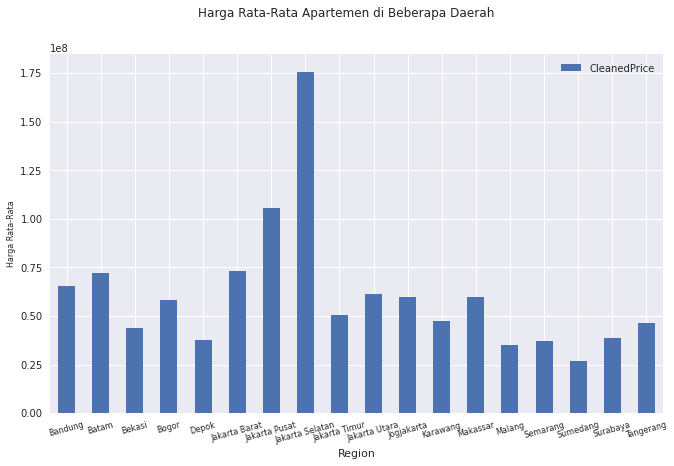

In [27]:
#Membuat plot ulang grafik 
df_new1=df_update[['Region','CleanedPrice']]
pivot2=pd.pivot_table(df_new1, values='CleanedPrice',index=['Region'],aggfunc=np.mean)

fig = plt.figure()
with plt.style.context('seaborn'):
    pivot2.plot(kind='bar',figsize=(11,6/10*11))
    plt.xticks(rotation = 15,fontsize=8)       
    plt.suptitle('Harga Rata-Rata Apartemen di Beberapa Daerah')    
    plt.ylabel('Harga Rata-Rata', fontsize=8)     
               

plt.show()

Jawaban nomor 3 tentang Kota/Kabupaten (Region) dengan harga rata-rata tertinggi yaitu **Kota Jakarta Selatan**

No 4. `Longitude` vs `Latitude`

In [28]:
df_update.groupby('Region')[['Longitude','Latitude']].describe()

Longitude                                                \
                    count        mean       std         min         25%   
Region                                                                    
Bandung              33.0  107.609680  0.027138  107.566476  107.593000   
Batam                 1.0  104.014900       NaN  104.014900  104.014900   
Bekasi              100.0  107.011726  0.051732  106.952500  106.979100   
Bogor                 3.0  106.808733  0.045091  106.782700  106.782700   
Depok                68.0  106.825164  0.032323  106.782390  106.794812   
Jakarta Barat      1346.0  106.764896  0.027780  106.678400  106.738730   
Jakarta Pusat      1082.0  106.839315  0.021144  106.791301  106.818029   
Jakarta Selatan    1526.0  106.820028  0.027494  106.723300  106.802160   
Jakarta Timur       372.0  106.887790  0.021131  106.866201  106.879075   
Jakarta Utara       422.0  106.857206  0.048989  106.750249  106.829210   
Jogjakarta            1.0  110.393900       NaN  110.393900  110.393900   
Karawang              5.0  107.272081  0.002193  107.271100  107.271100   
Makassar              1.0  119.441818       NaN  119.441818  119.441818   
Malang                1.0  112.616900       NaN  112.616900  112.616900   
Semarang              1.0  110.417200       NaN  110.417200  110.417200   
Sumedang              4.0  107.776125  0.007350  107.765100  107.776125   
Surabaya             13.0  112.772068  0.035982  112.672600  112.748300   
Tangerang           322.0  106.656978  0.040731  106.586901  106.629106   

                                                    Latitude            \
                        50%         75%         max    count      mean   
Region                                                                   
Bandung          107.604700  107.618300  107.681300     33.0 -6.909735   
Batam            104.014900  104.014900  104.014900      1.0  1.143400   
Bekasi           106.993400  107.012350  107.176300    100.0 -6.254043   
Bogor            106.782700  106.821750  106.860800      3.0 -6.558867   
Depok            106.832136  106.832472  106.893900     68.0 -6.361873   
Jakarta Barat    106.762396  106.789934  106.818858   1346.0 -6.177563   
Jakarta Pusat    106.838463  106.854936  106.875693   1082.0 -6.170545   
Jakarta Selatan  106.825918  106.842971  106.861756   1526.0 -6.246333   
Jakarta Timur    106.879075  106.899330  106.948933    372.0 -6.219594   
Jakarta Utara    106.883730  106.893189  106.924700    422.0 -6.139462   
Jogjakarta       110.393900  110.393900  110.393900      1.0 -7.773700   
Karawang         107.271100  107.271100  107.276003      5.0 -6.338230   
Makassar         119.441818  119.441818  119.441818      1.0 -5.155050   
Malang           112.616900  112.616900  112.616900      1.0 -7.949100   
Semarang         110.417200  110.417200  110.417200      1.0 -7.000700   
Sumedang         107.779800  107.779800  107.779800      4.0 -6.928250   
Surabaya         112.787300  112.787300  112.807241     13.0 -7.278857   
Tangerang        106.646000  106.682451  106.752698    322.0 -6.009359   

                                                                             
                      std       min       25%       50%       75%       max  
Region                                                                       
Bandung          0.026358 -6.955900 -6.923700 -6.912400 -6.883605 -6.869300  
Batam                 NaN  1.143400  1.143400  1.143400  1.143400  1.143400  
Bekasi           0.027809 -6.341700 -6.257300 -6.250700 -6.243400 -6.222400  
Bogor            0.004965 -6.564600 -6.560300 -6.556000 -6.556000 -6.556000  
Depok            0.032513 -6.427400 -6.372200 -6.360354 -6.336380 -6.317404  
Jakarta Barat    0.013957 -6.216423 -6.186415 -6.178351 -6.166036 -6.092000  
Jakarta Pusat    0.375356 -6.221632 -6.197352 -6.191791 -6.149718  6.139958  
Jakarta Selatan  0.024717 -6.307531 -6.258746 -6.245860 -6.224187 -6.208184  
Jakarta Timur    0.031461 -

- Nilai standar deviasi `Region` **Tangerang** dan **Jakarta Pusat** bagian `Latitude` menunjukkan nilai error yang cukup tinggi yang juga didukung nilai `max` nya yang 
  terlampau jauh dari Q3

In [29]:
# Untuk Jakarta Pusat 
df_jakpus = df_update[df_update['Region']=='Jakarta Pusat']
# df_jakpus

In [30]:
Q1 = df_jakpus['Latitude'].quantile(0.25)
Q3 = df_jakpus['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Cari data yang diluar outlier 
outlier_jakpus = df_jakpus.query("Latitude < (@Q1 - 1.5 * @IQR) or Latitude > (@Q3 + 1.5 * @IQR)")
outlier_jakpus   #indeks ke 826 adalah data outlier

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000


In [31]:
#untuk Tangerang
df_tng = df_update[df_update['Region']=='Tangerang']

In [32]:
Q1 = df_tng['Latitude'].quantile(0.25)
Q3 = df_tng['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Cari data yang diluar outlier 
outlier_tng = df_tng.query("Latitude < (@Q1 - 1.5 * @IQR) or Latitude > (@Q3 + 1.5 * @IQR)")
outlier_tng   #indeks ke 951, 1140, 2343, 3142, 3174, 4468 adalah data outlier

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.6381,6.3043,1,26.0,Tower lotus,20,IDR,40000000,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.6381,6.3043,0,20.0,Tower Rose,17,IDR,40000000,40000000
2343,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.6381,6.3043,1,25.0,Tower Tulip,20,IDR,55000000,55000000
3142,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.6381,6.3043,1,25.0,Tower Tulip,18,IDR,55000000,55000000
3174,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.6381,6.3043,1,22.0,Tower Tulip,18,IDR,45000000,45000000
4468,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.6381,6.3043,1,26.0,Tower Tulip,19,IDR,60000000,60000000


In [33]:
df_temp1 = df_update.copy()
df_temp1=df_temp1.drop(labels=[826,951,1140,2343,3142,3174,4468], axis=0)

In [34]:
df_jakpus_temp = df_temp1[df_temp1['Region']=='Jakarta Pusat']

In [35]:
df_tng_temp = df_temp1[df_temp1['Region']=='Tangerang']

In [36]:
df_temp1.groupby('Region')[['Longitude','Latitude']].describe()

Longitude                                                \
                    count        mean       std         min         25%   
Region                                                                    
Bandung              33.0  107.609680  0.027138  107.566476  107.593000   
Batam                 1.0  104.014900       NaN  104.014900  104.014900   
Bekasi              100.0  107.011726  0.051732  106.952500  106.979100   
Bogor                 3.0  106.808733  0.045091  106.782700  106.782700   
Depok                68.0  106.825164  0.032323  106.782390  106.794812   
Jakarta Barat      1346.0  106.764896  0.027780  106.678400  106.738730   
Jakarta Pusat      1081.0  106.839326  0.021150  106.791301  106.818029   
Jakarta Selatan    1526.0  106.820028  0.027494  106.723300  106.802160   
Jakarta Timur       372.0  106.887790  0.021131  106.866201  106.879075   
Jakarta Utara       422.0  106.857206  0.048989  106.750249  106.829210   
Jogjakarta            1.0  110.393900       NaN  110.393900  110.393900   
Karawang              5.0  107.272081  0.002193  107.271100  107.271100   
Makassar              1.0  119.441818       NaN  119.441818  119.441818   
Malang                1.0  112.616900       NaN  112.616900  112.616900   
Semarang              1.0  110.417200       NaN  110.417200  110.417200   
Sumedang              4.0  107.776125  0.007350  107.765100  107.776125   
Surabaya             13.0  112.772068  0.035982  112.672600  112.748300   
Tangerang           316.0  106.657337  0.041033  106.586901  106.629106   

                                                    Latitude            \
                        50%         75%         max    count      mean   
Region                                                                   
Bandung          107.604700  107.618300  107.681300     33.0 -6.909735   
Batam            104.014900  104.014900  104.014900      1.0  1.143400   
Bekasi           106.993400  107.012350  107.176300    100.0 -6.254043   
Bogor            106.782700  106.821750  106.860800      3.0 -6.558867   
Depok            106.832136  106.832472  106.893900     68.0 -6.361873   
Jakarta Barat    106.762396  106.789934  106.818858   1346.0 -6.177563   
Jakarta Pusat    106.838463  106.854936  106.875693   1081.0 -6.181933   
Jakarta Selatan  106.825918  106.842971  106.861756   1526.0 -6.246333   
Jakarta Timur    106.879075  106.899330  106.948933    372.0 -6.219594   
Jakarta Utara    106.883730  106.893189  106.924700    422.0 -6.139462   
Jogjakarta       110.393900  110.393900  110.393900      1.0 -7.773700   
Karawang         107.271100  107.271100  107.276003      5.0 -6.338230   
Makassar         119.441818  119.441818  119.441818      1.0 -5.155050   
Malang           112.616900  112.616900  112.616900      1.0 -7.949100   
Semarang         110.417200  110.417200  110.417200      1.0 -7.000700   
Sumedang         107.779800  107.779800  107.779800      4.0 -6.928250   
Surabaya         112.787300  112.787300  112.807241     13.0 -7.278857   
Tangerang        106.650181  106.682451  106.752698    316.0 -6.243162   

                                                                             
                      std       min       25%       50%       75%       max  
Region                                                                       
Bandung          0.026358 -6.955900 -6.923700 -6.912400 -6.883605 -6.869300  
Batam                 NaN  1.143400  1.143400  1.143400  1.143400  1.143400  
Bekasi           0.027809 -6.341700 -6.257300 -6.250700 -6.243400 -6.222400  
Bogor            0.004965 -6.564600 -6.560300 -6.556000 -6.556000 -6.556000  
Depok            0.032513 -6.427400 -6.372200 -6.360354 -6.336380 -6.317404  
Jakarta Barat    0.013957 -6.216423 -6.186415 -6.178351 -6.166036 -6.092000  
Jakarta Pusat    0.023869 -6.221632 -6.197352 -6.191791 -6.149718 -6.142811  
Jakarta Selatan  0.024717 -6.307531 -6.258746 -6.245860 -6.224187 -6.208184  
Jakarta Timur    0.031461 -

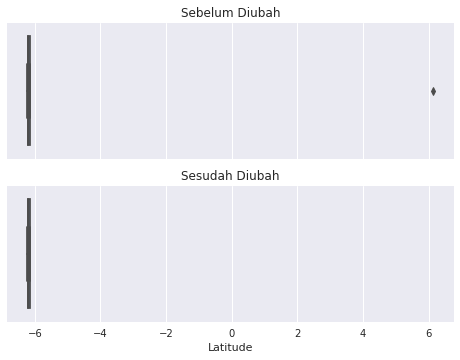

In [37]:
#untuk Jakarta Pusat
with plt.style.context('seaborn'):  
    fig, (ax_box1, ax_box2) = plt.subplots(2, sharex = True)
        
    sns.boxplot(data = df_jakpus, x = 'Latitude', ax = ax_box1)
    sns.boxplot(data = df_jakpus_temp, x = 'Latitude', ax = ax_box2)
        
    ax_box1.set(xlabel = '')
    ax_box1.title.set_text('Sebelum Diubah')
    ax_box2.title.set_text('Sesudah Diubah')
        
plt.show()

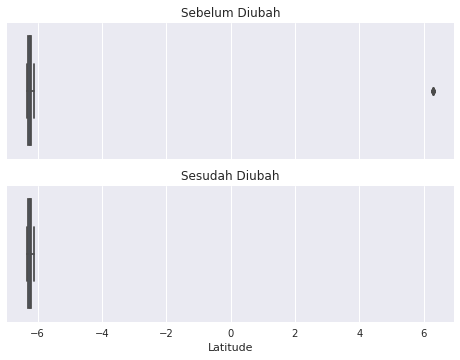

In [38]:
#Untuk Tangerang
with plt.style.context('seaborn'):  
    fig, (ax_box1, ax_box2) = plt.subplots(2, sharex = True)
        
    sns.boxplot(data = df_tng, x = 'Latitude', ax = ax_box1)
    sns.boxplot(data = df_tng_temp, x = 'Latitude', ax = ax_box2)
        
    ax_box1.set(xlabel = '')
    ax_box1.title.set_text('Sebelum Diubah')
    ax_box2.title.set_text('Sesudah Diubah')
        
plt.show()

Pada nomor 4 terdapat kejanggalan pada data `Latitude` di **Jakarta Pusat**  dan **Tangerang**  dimana setelah diubah dengan cara menghilangkan 1 data outlier dan 6 data outlier berurut-urut pada Jakarta Pusat dan Tangerang sehingga didapatkan nilai std yang semakin baik (mendekati 0) dan intepretasi *box plot* yang juga membaik